# Retail Challenge

### **Contexto**

En un mundo donde las empresas dependen cada vez más de los datos para tomar decisiones estratégicas, la capacidad de segmentar clientes de manera efectiva se vuelve crucial. La segmentación de clientes permite a las empresas personalizar sus estrategias de marketing, mejorar la retención de clientes y maximizar el valor del cliente a lo largo del tiempo.

### **Objetivo**

Este proyecto tiene como objetivo desarrollar una aplicación web interactiva que permita a los científicos de datos realizar análisis de segmentación de clientes utilizando la metodología RFM (Recencia, Frecuencia, Valor Monetario). A través de procesos como lo son:

- Estadística Descriptiva
- Segmentación de Clientes
- Predicción de Abandono
- Valor del cliente a través del tiempo (CTLV)


# Índice

- [Descripción de los datos](#Descripción-de-los-datos)

- [Analisis Estadistico Descriptivo](#Analisis-Estadistico-Descriptivo)

- [Visualizaciones](#Visualizaciones)

- [Reporte de resultados](#Reporte-de-resultados)


# Descripción de los datos

- INVOICE_NO : Número de serie de factura
- STOCK_CODE : Número serie del producto
- DESCRIPTION : Descripción del producto
- QUANTITY : Cantidad de compra del producto
- INVOICE_DATE : Fecha de facturación
- UNIT_PRICE : Precio unitario
- CUSTOMER_ID : ID del cliente
- REGION : País de origen de la compra

# Analisis Estadistico Descriptivo

## Carga de dataset.

In [6]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import plotly.express as px
from datetime import datetime

In [7]:
df = pd.read_csv(r"Online_Retail.csv", encoding='unicode_escape')

In [8]:
df.sample(10)

INVOICE_NO STOCK_CODE                      DESCRIPTION  QUANTITY  \
332243     566060      21207   SKULL AND CROSSBONES  GARLAND          4   
277689     561170      22492          MINI PAINT SET VINTAGE         36   
220324     556183      84817     DANISH ROSE DECORATIVE PLATE        12   
287805     562114      21668   RED STRIPE CERAMIC DRAWER KNOB         4   
194162     553552      23209        LUNCH BAG DOILEY PATTERN         10   
39564      539653      22188          BLACK HEART CARD HOLDER         2   
298091     562980      22457  NATURAL SLATE HEART CHALKBOARD          6   
172639     551548      22175                PINK OWL SOFT TOY         6   
307562     563923     51014C            FEATHER PENCOAL BLACK        96   
459124     575867      22906  12 MESSAGE CARDS WITH ENVELOPES         2   

            INVOICE_DATE  UNIT_PRICE  CUSTOMER_ID          REGION  
332243  08/09/2020 15:27        1.63          NaN  United Kingdom  
277689  25/07/2020 13:16        0.65      16027.0  United Kingdom  
220324  09/06/2020 11:37        2.10      13134.0  United Kingdom  
287805  02/08/2020 16:14        3.29          NaN  United Kingdom  
194162  17/05/2020 16:23        1.65      17702.0  United Kingdom  
39564   20/12/2019 16:50        3.95      13564.0  United Kingdom  
298091  11/08/2020 11:44        2.95      17686.0  United Kingdom  
172639  03/05/2020 09:44        2.95      14149.0  United Kingdom  
307562  21/08/2020 14:19        0.39      14460.0  United Kingdom  
459124  11/11/2020 12:44        1.65      15034.0  United Kingdom

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   INVOICE_NO    541909 non-null  object 
 1   STOCK_CODE    541909 non-null  object 
 2   DESCRIPTION   540455 non-null  object 
 3   QUANTITY      541909 non-null  int64  
 4   INVOICE_DATE  541909 non-null  object 
 5   UNIT_PRICE    541909 non-null  float64
 6   CUSTOMER_ID   406829 non-null  float64
 7   REGION        541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


## Transformacion de tipo de datos.

In [10]:
df['CUSTOMER_ID'] = df['CUSTOMER_ID'].astype('object')

In [11]:
df['INVOICE_DATE'] = pd.to_datetime(df['INVOICE_DATE'], format="%d/%m/%Y %H:%M")

In [12]:
df['INVOICE_DATE']

0        2019-12-01 08:26:00
1        2019-12-01 08:26:00
2        2019-12-01 08:26:00
3        2019-12-01 08:26:00
4        2019-12-01 08:26:00
                 ...        
541904   2020-12-09 12:50:00
541905   2020-12-09 12:50:00
541906   2020-12-09 12:50:00
541907   2020-12-09 12:50:00
541908   2020-12-09 12:50:00
Name: INVOICE_DATE, Length: 541909, dtype: datetime64[ns]

## Analisis estadistico. 

In [13]:
df.describe().T

count      mean         std       min   25%   50%    75%  \
QUANTITY    541909.0  9.552250  218.081158 -80995.00  1.00  3.00  10.00   
UNIT_PRICE  541909.0  4.611114   96.759853 -11062.06  1.25  2.08   4.13   

                max  
QUANTITY    80995.0  
UNIT_PRICE  38970.0

In [14]:
df.select_dtypes('object').describe().T

count  unique                                 top    freq
INVOICE_NO     541909   25900                              573585    1114
STOCK_CODE     541909    4070                              85123A    2313
DESCRIPTION    540455    4214  WHITE HANGING HEART T-LIGHT HOLDER    2369
CUSTOMER_ID  406829.0  4372.0                             17841.0  7983.0
REGION         541909      38                      United Kingdom  495478

<Axes: xlabel='QUANTITY'>

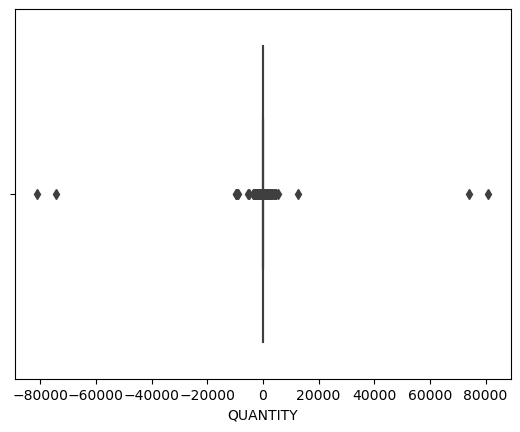

In [15]:
sns.boxplot(x=df['QUANTITY'])

<Axes: xlabel='UNIT_PRICE'>

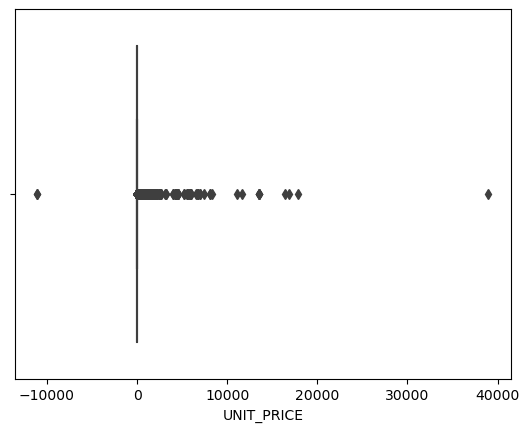

In [16]:
sns.boxplot(x=df['UNIT_PRICE'])

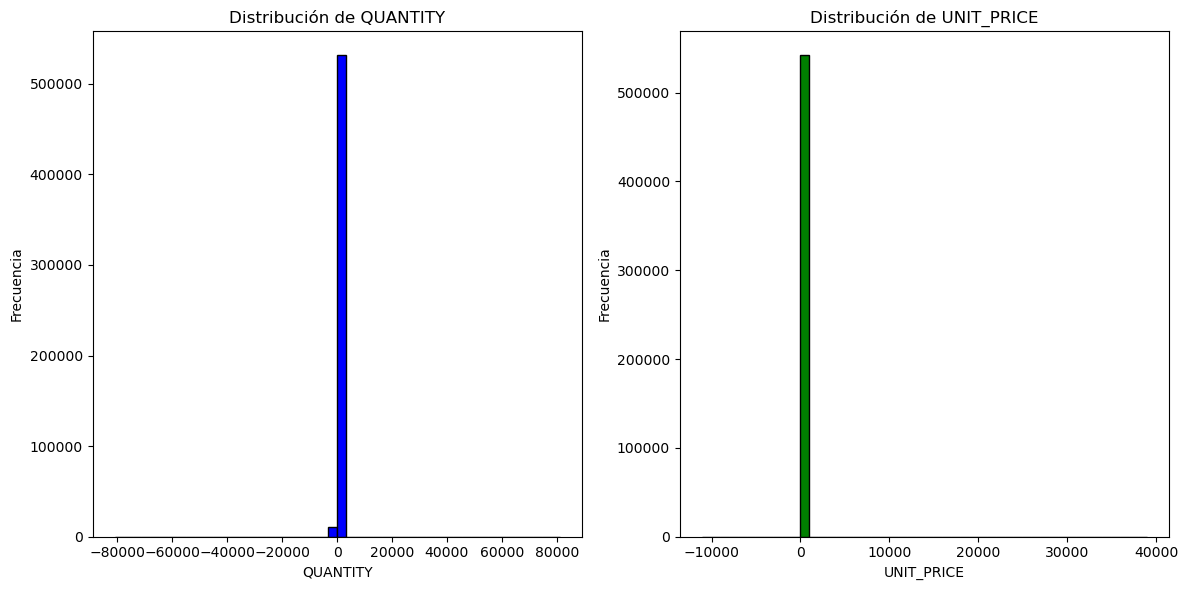

In [17]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(df['QUANTITY'], bins=50, color='blue', edgecolor='black')
plt.title('Distribución de QUANTITY')
plt.xlabel('QUANTITY')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
plt.hist(df['UNIT_PRICE'], bins=50, color='green', edgecolor='black')
plt.title('Distribución de UNIT_PRICE')
plt.xlabel('UNIT_PRICE')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

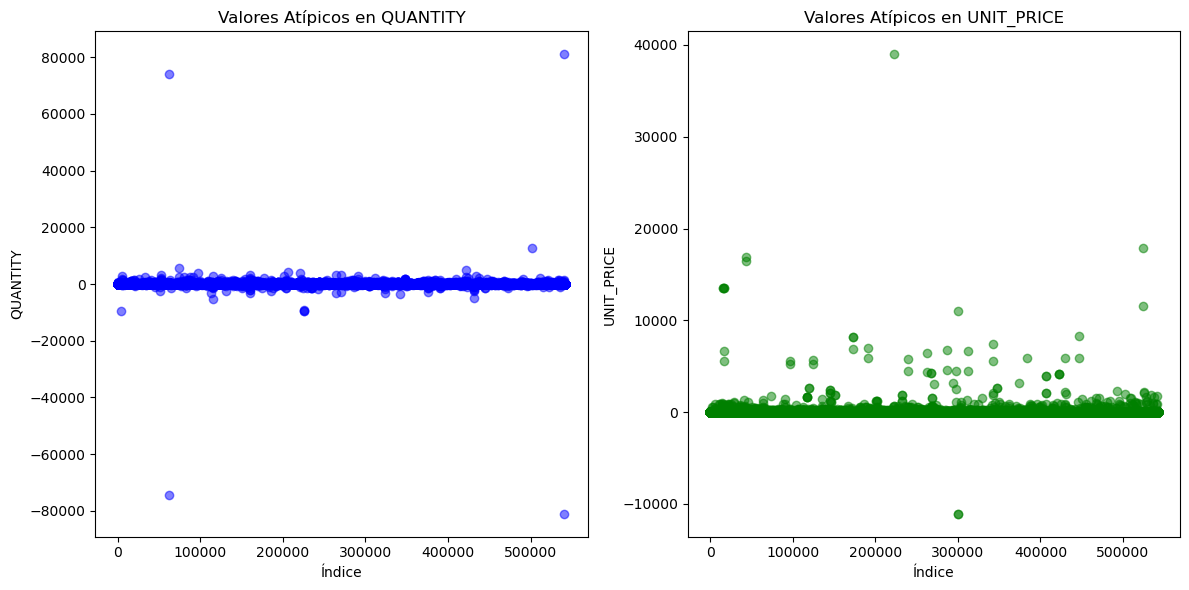

In [18]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(range(len(df)), df['QUANTITY'], alpha=0.5, color='blue')
plt.title('Valores Atípicos en QUANTITY')
plt.xlabel('Índice')
plt.ylabel('QUANTITY')

plt.subplot(1, 2, 2)
plt.scatter(range(len(df)), df['UNIT_PRICE'], alpha=0.5, color='green')
plt.title('Valores Atípicos en UNIT_PRICE')
plt.xlabel('Índice')
plt.ylabel('UNIT_PRICE')

plt.tight_layout()
plt.show()

## Tratamiendo de valores ausentes.

In [19]:
df['DESCRIPTION'] = df['DESCRIPTION'].replace('?', 'unknown')

In [20]:
df['DESCRIPTION'].fillna('unknown', inplace=True)

In [21]:
df[df['DESCRIPTION']=='unknown']

INVOICE_NO STOCK_CODE DESCRIPTION  QUANTITY        INVOICE_DATE  \
622        536414      22139     unknown        56 2019-12-01 11:52:00   
1970       536545      21134     unknown         1 2019-12-01 14:32:00   
1971       536546      22145     unknown         1 2019-12-01 14:33:00   
1972       536547      37509     unknown         1 2019-12-01 14:33:00   
1987       536549     85226A     unknown         1 2019-12-01 14:34:00   
...           ...        ...         ...       ...                 ...   
535322     581199      84581     unknown        -2 2020-12-07 18:26:00   
535326     581203      23406     unknown        15 2020-12-07 18:31:00   
535332     581209      21620     unknown         6 2020-12-07 18:35:00   
536981     581234      72817     unknown        27 2020-12-08 10:33:00   
538554     581408      85175     unknown        20 2020-12-08 14:06:00   

        UNIT_PRICE CUSTOMER_ID          REGION  
622            0.0         NaN  United Kingdom  
1970           0.0         NaN  United Kingdom  
1971           0.0         NaN  United Kingdom  
1972           0.0         NaN  United Kingdom  
1987           0.0         NaN  United Kingdom  
...            ...         ...             ...  
535322         0.0         NaN  United Kingdom  
535326         0.0         NaN  United Kingdom  
535332         0.0         NaN  United Kingdom  
536981         0.0         NaN  United Kingdom  
538554         0.0         NaN  United Kingdom  

[1501 rows x 8 columns]

In [22]:
100*df[df['DESCRIPTION']=='unknown']['INVOICE_NO'].count()/df.shape[0]

0.2769837740284808

In [23]:
df.drop(df[df['DESCRIPTION']=='unknown'].index,axis=0,inplace=True)

In [24]:
df[df['CUSTOMER_ID'].isna()]

INVOICE_NO STOCK_CODE                      DESCRIPTION  QUANTITY  \
1443       536544      21773  DECORATIVE ROSE BATHROOM BOTTLE         1   
1444       536544      21774  DECORATIVE CATS BATHROOM BOTTLE         2   
1445       536544      21786               POLKADOT RAIN HAT          4   
1446       536544      21787            RAIN PONCHO RETROSPOT         2   
1447       536544      21790               VINTAGE SNAP CARDS         9   
...           ...        ...                              ...       ...   
541536     581498     85099B          JUMBO BAG RED RETROSPOT         5   
541537     581498     85099C   JUMBO  BAG BAROQUE BLACK WHITE         4   
541538     581498      85150    LADIES & GENTLEMEN METAL SIGN         1   
541539     581498      85174                S/4 CACTI CANDLES         1   
541540     581498        DOT                   DOTCOM POSTAGE         1   

              INVOICE_DATE  UNIT_PRICE CUSTOMER_ID          REGION  
1443   2019-12-01 14:32:00        2.51         NaN  United Kingdom  
1444   2019-12-01 14:32:00        2.51         NaN  United Kingdom  
1445   2019-12-01 14:32:00        0.85         NaN  United Kingdom  
1446   2019-12-01 14:32:00        1.66         NaN  United Kingdom  
1447   2019-12-01 14:32:00        1.66         NaN  United Kingdom  
...                    ...         ...         ...             ...  
541536 2020-12-09 10:26:00        4.13         NaN  United Kingdom  
541537 2020-12-09 10:26:00        4.13         NaN  United Kingdom  
541538 2020-12-09 10:26:00        4.96         NaN  United Kingdom  
541539 2020-12-09 10:26:00       10.79         NaN  United Kingdom  
541540 2020-12-09 10:26:00     1714.17         NaN  United Kingdom  

[133579 rows x 8 columns]

In [25]:
100*df['CUSTOMER_ID'].isna().sum()/df.shape[0]

24.71817589672988

In [26]:
df['CUSTOMER_ID'].fillna('unknown', inplace=True)

In [27]:
df.isna().sum()

INVOICE_NO      0
STOCK_CODE      0
DESCRIPTION     0
QUANTITY        0
INVOICE_DATE    0
UNIT_PRICE      0
CUSTOMER_ID     0
REGION          0
dtype: int64

## Tratamiento de duplicados.

In [28]:
df = df.drop_duplicates().reset_index(drop=True)

In [29]:
df.duplicated().sum()

0

## Seccion APARTE

### Quantity

In [30]:
df[df['QUANTITY'] < -2000]

INVOICE_NO STOCK_CODE                          DESCRIPTION  QUANTITY  \
4216      C536757      84347  ROTATING SILVER ANGELS T-LIGHT HLDR     -9360   
50161      540564      22617                  mouldy thrown away.     -2600   
60844     C541433      23166       MEDIUM CERAMIC TOP STORAGE JAR    -74215   
112219     545990      84598                                check     -3000   
114433     546152     72140F                           throw away     -5368   
129826     547560      72732               thrown away-can't sell     -2472   
158057    C550456      21108   FAIRY CAKE FLANNEL ASSORTED COLOUR     -3114   
182747     552733      23059                    Thrown away-rusty     -2376   
222766     556687      23003         Printing smudges/thrown away     -9058   
222767     556690      23005         printing smudges/thrown away     -9600   
222768     556691      23005         printing smudges/thrown away     -9600   
260766     560039      20713         wrongly marked. 23343 in box     -3100   
371215     569466      23270               incorrect stock entry.     -2880   
426346     573593    79323LP                Unsaleable destroyed.     -2618   
426347     573594     79323P                Unsaleable destroyed.     -2003   
426349     573596     79323W                Unsaleable destroyed.     -4830   
533660    C581484      23843           PAPER CRAFT  LITTLE BIRDIE    -80995   

              INVOICE_DATE  UNIT_PRICE CUSTOMER_ID          REGION  
4216   2019-12-02 14:23:00        0.03     15838.0  United Kingdom  
50161  2020-01-10 10:36:00        0.00     unknown  United Kingdom  
60844  2020-01-18 10:17:00        1.04     12346.0  United Kingdom  
112219 2020-03-08 13:07:00        0.00     unknown  United Kingdom  
114433 2020-03-09 17:25:00        0.00     unknown  United Kingdom  
129826 2020-03-23 17:28:00        0.00     unknown  United Kingdom  
158057 2020-04-18 13:08:00        2.10     15749.0  United Kingdom  
182747 2020-05-11 10:48:00        0.00     unknown  United Kingdom  
222766 2020-06-14 10:36:00        0.00     unknown  United Kingdom  
222767 2020-06-14 10:37:00        0.00     unknown  United Kingdom  
222768 2020-06-14 10:37:00        0.00     unknown  United Kingdom  
260766 2020-07-14 14:27:00        0.00     unknown  United Kingdom  
371215 2020-10-04 11:42:00        0.00     unknown  United Kingdom  
426346 2020-10-31 15:16:00        0.00     unknown  United Kingdom  
426347 2020-10-31 15:16:00        0.00     unknown  United Kingdom  
426349 2020-10-31 15:17:00        0.00     unknown  United Kingdom  
533660 2020-12-09 09:27:00        2.08     16446.0  United Kingdom

In [31]:
100*df[df['QUANTITY'] <=0]['INVOICE_NO'].count()/df.shape[0]

1.8096199125462495

In [32]:
#Eliminamos los datos dado que el porcentage es menor
df.drop(df[df['QUANTITY'] <= 0]['QUANTITY'].index,axis=0,inplace=True)

In [33]:
df[df['QUANTITY'] > 3000]

INVOICE_NO STOCK_CODE                          DESCRIPTION  QUANTITY  \
52005      540815      21108   FAIRY CAKE FLANNEL ASSORTED COLOUR      3114   
60839      541431      23166       MEDIUM CERAMIC TOP STORAGE JAR     74215   
96207      544612      22053                EMPIRE DESIGN ROSETTE      3906   
158456     550461      21108   FAIRY CAKE FLANNEL ASSORTED COLOUR      3114   
203564     554868      22197                 SMALL POPCORN HOLDER      4300   
260767     560040      23343                  came coded as 20713      3100   
267686     560599      18007  ESSENTIAL BALM 3.5g TIN IN ENVELOPE      3186   
416713     573008      84077    WORLD WAR 2 GLIDERS ASSTD DESIGNS      4800   
495915     578841      84826       ASSTD DESIGN 3D PAPER STICKERS     12540   
533659     581483      23843           PAPER CRAFT  LITTLE BIRDIE     80995   

              INVOICE_DATE  UNIT_PRICE CUSTOMER_ID          REGION  
52005  2020-01-11 12:55:00        2.10     15749.0  United Kingdom  
60839  2020-01-18 10:01:00        1.04     12346.0  United Kingdom  
96207  2020-02-22 10:43:00        0.82     18087.0  United Kingdom  
158456 2020-04-18 13:20:00        2.10     15749.0  United Kingdom  
203564 2020-05-27 10:52:00        0.72     13135.0  United Kingdom  
260767 2020-07-14 14:28:00        0.00     unknown  United Kingdom  
267686 2020-07-19 17:04:00        0.06     14609.0  United Kingdom  
416713 2020-10-27 12:26:00        0.21     12901.0  United Kingdom  
495915 2020-11-25 15:57:00        0.00     13256.0  United Kingdom  
533659 2020-12-09 09:15:00        2.08     16446.0  United Kingdom

### Unit Price

In [34]:
df[df['UNIT_PRICE'] <= 0].sample(20)

INVOICE_NO STOCK_CODE                          DESCRIPTION  QUANTITY  \
427627     573881      21098                   had been put aside       108   
122558     546933      22623        BOX OF VINTAGE JIGSAW BLOCKS          1   
40877      539856      22550                     HOLIDAY FUN LUDO         1   
462704     576426      21051                                found       240   
14062      537534      22353  LUNCH BOX WITH CUTLERY FAIRY CAKES          1   
462701     576414     17012F                                check        14   
507331     579563     85135C                                found        36   
190769     553521      48184                DOORMAT ENGLISH ROSE          1   
332563     566325      22035                          taig adjust        36   
354623     568158       PADS           PADS TO MATCH ALL CUSHIONS         1   
415478     572890      20713                      Marked as 23343       400   
190791     553521      22518             CHILDS GARDEN BRUSH BLUE         1   
341097     567129      72127                            found box        24   
413589     572724     84507C                           adjustment         4   
122564     546933      22364         GLASS JAR DIGESTIVE BISCUITS         2   
14041      537534      22474              SPACEBOY TV DINNER TRAY         1   
239488     558340      22684        FRENCH BLUE METAL DOOR SIGN 9         1   
40359      539750      22652                    TRAVEL SEWING KIT         1   
14074      537534      20615         BLUE POLKADOT PASSPORT COVER         1   
225894     556939     46000S         POLYESTER FILLER PAD 40x40cm       160   

              INVOICE_DATE  UNIT_PRICE CUSTOMER_ID          REGION  
427627 2020-11-01 13:22:00         0.0     unknown  United Kingdom  
122558 2020-03-18 11:02:00         0.0     unknown  United Kingdom  
40877  2019-12-22 14:41:00         0.0     unknown  United Kingdom  
462704 2020-11-15 11:24:00         0.0     unknown  United Kingdom  
14062  2019-12-07 11:48:00         0.0     unknown  United Kingdom  
462701 2020-11-15 11:21:00         0.0     unknown  United Kingdom  
507331 2020-11-30 11:41:00         0.0     unknown  United Kingdom  
190769 2020-05-17 14:35:00         0.0     unknown  United Kingdom  
332563 2020-09-12 12:03:00         0.0     unknown  United Kingdom  
354623 2020-09-25 12:22:00         0.0     16133.0  United Kingdom  
415478 2020-10-26 14:14:00         0.0     unknown  United Kingdom  
190791 2020-05-17 14:35:00         0.0     unknown  United Kingdom  
341097 2020-09-16 14:05:00         0.0     unknown  United Kingdom  
413589 2020-10-25 15:14:00         0.0     unknown  United Kingdom  
122564 2020-03-18 11:02:00         0.0     unknown  United Kingdom  
14041  2019-12-07 11:48:00         0.0     unknown  United Kingdom  
239488 2020-06-28 14:01:00         0.0     unknown  United Kingdom  
40359  2019-12-21 15:40:00         0.0     unknown  United Kingdom  
14074  2019-12-07 11:48:00         0.0     unknown  United Kingdom  
225894 2020-06-15 16:34:00         0.0     unknown  United Kingdom

In [35]:
100*df[df['UNIT_PRICE'] <= 0]['INVOICE_NO'].count()/df.shape[0]

0.109999695502573

In [36]:
#Dado que el porcentaje es bajo elimnamos estos datos
df.drop(df[df['UNIT_PRICE'] <= 0]['UNIT_PRICE'].index,axis=0,inplace=True)

In [37]:
# VAMOS A BORRAR ESTOS DATOS

# df[(df['UNIT_PRICE'] == 0) & (df['DESCRIPTION'] == 'unknown') & (df['CUSTOMER_ID'] == 'unknown')].dropna(inplace=True).reset_index(drop=True)

## Segmentacion por clusteres.

In [38]:
data_positive_quantity = df.copy()

# Calcular el gasto total por cliente usando .loc para evitar SettingWithCopyWarning
data_positive_quantity.loc[:, 'TOTAL_SPENT'] = data_positive_quantity['QUANTITY'] * data_positive_quantity['UNIT_PRICE']

# Agrupar por 'CUSTOMER_ID' y calcular el gasto total y la cantidad total comprada
customer_data = data_positive_quantity.groupby('CUSTOMER_ID').agg(
    TOTAL_SPENT=pd.NamedAgg(column='TOTAL_SPENT', aggfunc='sum'),
    TOTAL_QUANTITY=pd.NamedAgg(column='QUANTITY', aggfunc='sum')
).reset_index()

# Mostrar los primeros registros del DataFrame para verificar
print(customer_data.head())

  CUSTOMER_ID  TOTAL_SPENT  TOTAL_QUANTITY
0     12346.0     77183.60           74215
1     12347.0      4310.00            2458
2     12348.0      1797.24            2341
3     12349.0      1757.55             631
4     12350.0       334.40             197


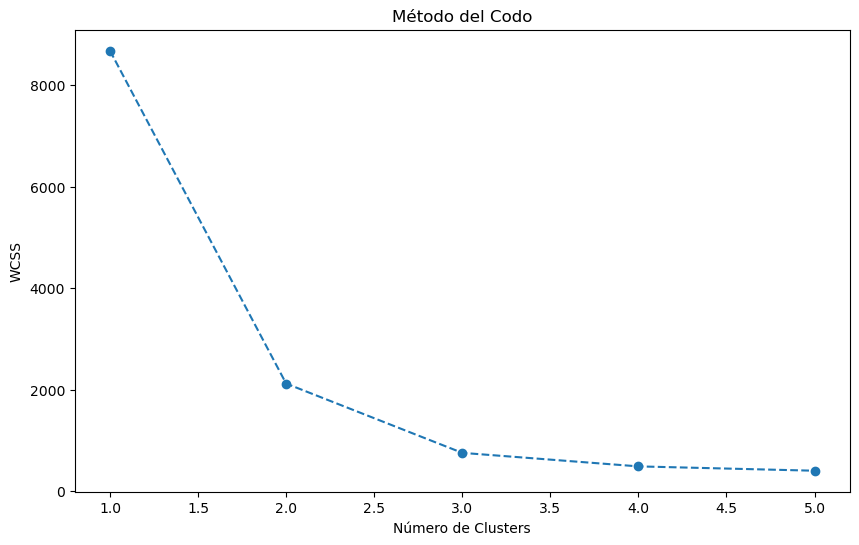

In [39]:

# Seleccionar las características para la segmentación
features = customer_data[['TOTAL_SPENT', 'TOTAL_QUANTITY']]

# Estandarizar los datos
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Determinar el número óptimo de clusters utilizando el método del codo con un rango reducido
wcss = []
for i in range(1, 6):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_)

# Graficar el método del codo con el rango reducido
plt.figure(figsize=(10, 6))
plt.plot(range(1, 6), wcss, marker='o', linestyle='--')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.show()

c:\Users\wasa_\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\wasa_\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\wasa_\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\wasa_\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

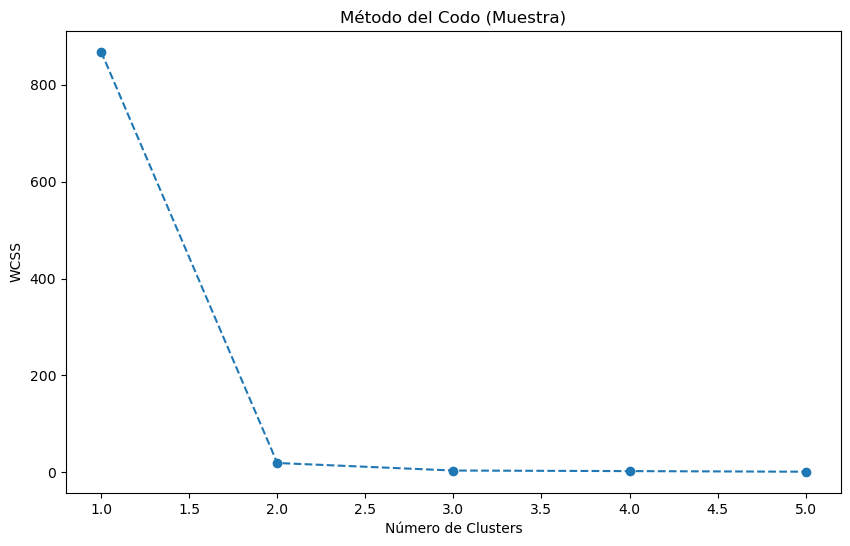

In [40]:
# Tomar una muestra del 10% del dataset de clientes para reducir la carga computacional
sampled_customer_data = customer_data.sample(frac=0.1, random_state=42)

# Seleccionar las características para la segmentación
features_sampled = sampled_customer_data[['TOTAL_SPENT', 'TOTAL_QUANTITY']]

# Estandarizar los datos
features_sampled_scaled = scaler.fit_transform(features_sampled)

# Determinar el número óptimo de clusters utilizando el método del codo con la muestra
wcss_sampled = []
for i in range(1, 6):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(features_sampled_scaled)
    wcss_sampled.append(kmeans.inertia_)

# Graficar el método del codo con el rango reducido y la muestra
plt.figure(figsize=(10, 6))
plt.plot(range(1, 6), wcss_sampled, marker='o', linestyle='--')
plt.title('Método del Codo (Muestra)')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.show()

c:\Users\wasa_\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


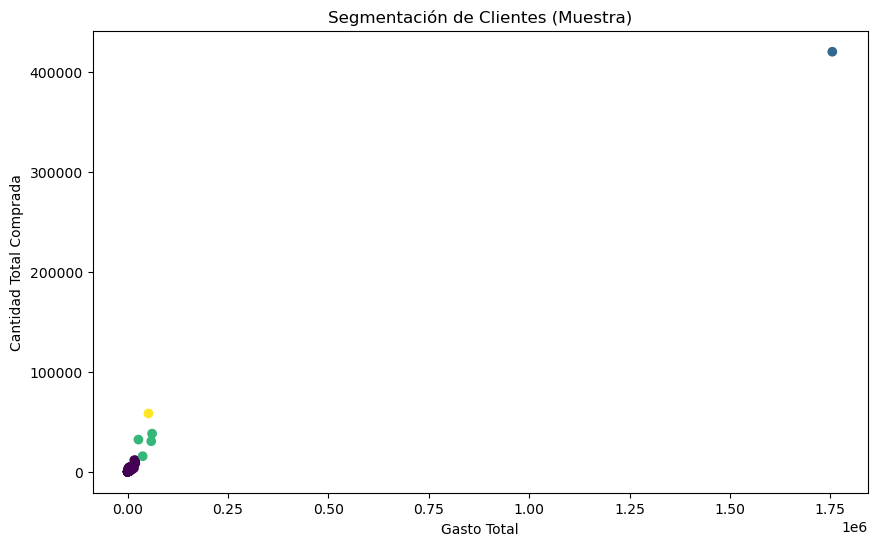

In [41]:
# Aplicar K-means con 3 clusters a la muestra de datos
kmeans = KMeans(n_clusters=4, random_state=42)
sampled_customer_data['CLUSTER'] = kmeans.fit_predict(features_sampled_scaled)

# Visualizar los resultados
plt.figure(figsize=(10, 6))
plt.scatter(sampled_customer_data['TOTAL_SPENT'], sampled_customer_data['TOTAL_QUANTITY'], c=sampled_customer_data['CLUSTER'], cmap='viridis')
plt.title('Segmentación de Clientes (Muestra)')
plt.xlabel('Gasto Total')
plt.ylabel('Cantidad Total Comprada')
plt.show()

## Segmentacion por grupos.

In [42]:
df['TOTAL_REVENUE'] = df['QUANTITY'] * df['UNIT_PRICE']

df['MONTH'] = df['INVOICE_DATE'].dt.month
df['YEAR'] = df['INVOICE_DATE'].dt.year
df['DAY'] = df['INVOICE_DATE'].dt.day_of_week

df.sample(10)

INVOICE_NO STOCK_CODE                         DESCRIPTION  QUANTITY  \
263139     560250      23198      PANTRY MAGNETIC  SHOPPING LIST         5   
173102     551956     84406B      CREAM CUPID HEARTS COAT HANGER         1   
328345     566057      21211      SET OF 72 SKULL PAPER  DOILIES         4   
417603     573094      22348         TEA BAG PLATE RED RETROSPOT         6   
312505     564747      22151           PLACE SETTING WHITE HEART        24   
306143     564139      21108  FAIRY CAKE FLANNEL ASSORTED COLOUR         9   
105028     545324      82482   WOODEN PICTURE FRAME WHITE FINISH         2   
402157     571831      22621          TRADITIONAL KNITTING NANCY        12   
250026     559157      23286            BLUE VINTAGE SPOT BEAKER         8   
132022     547789      22670           FRENCH WC SIGN BLUE METAL        12   

              INVOICE_DATE  UNIT_PRICE CUSTOMER_ID          REGION  \
263139 2020-07-17 12:31:00        1.45     14659.0  United Kingdom   
173102 2020-05-05 12:22:00        4.15     15021.0  United Kingdom   
328345 2020-09-08 15:16:00        1.45     17997.0  United Kingdom   
417603 2020-10-27 14:39:00        0.85     15707.0  United Kingdom   
312505 2020-08-28 16:09:00        0.42     14869.0  United Kingdom   
306143 2020-08-23 11:41:00        2.55     16904.0  United Kingdom   
105028 2020-03-01 14:58:00        2.55     13110.0  United Kingdom   
402157 2020-10-19 12:01:00        1.65     16979.0  United Kingdom   
250026 2020-07-06 15:53:00        0.85     13999.0  United Kingdom   
132022 2020-03-25 12:04:00        1.25     14911.0            EIRE   

        TOTAL_REVENUE  MONTH  YEAR  DAY  
263139           7.25      7  2020    4  
173102           4.15      5  2020    1  
328345           5.80      9  2020    1  
417603           5.10     10  2020    1  
312505          10.08      8  2020    4  
306143          22.95      8  2020    6  
105028           5.10      3  2020    6  
402157          19.80     10  2020    0  
250026           6.80      7  2020    0  
132022          15.00      3  2020    2

# Visualizaciones

##  Frequency. 
---
Esta métrica se puede construir contando el número de compras que un cliente ha hecho, puede ser por compra, o por producto, depende del enfoque que uno le 
quiera dar

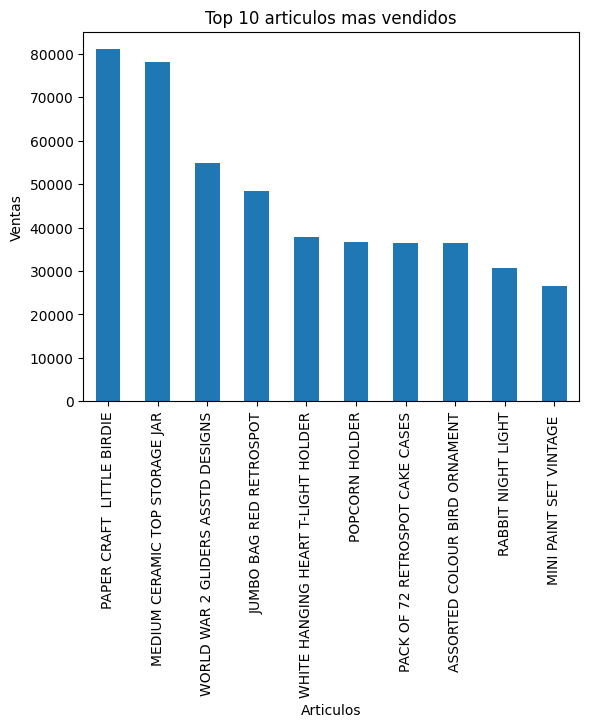

In [38]:
# ARTICULOS MAS VENDIDOS
top_10_products = df.groupby('DESCRIPTION')['QUANTITY'].sum().sort_values(ascending=False).head(10)

top_10_products.plot(kind="bar",x="DESCRIPTION",title="Top 10 articulos mas vendidos",ylabel="Ventas",xlabel="Articulos")
plt.show()

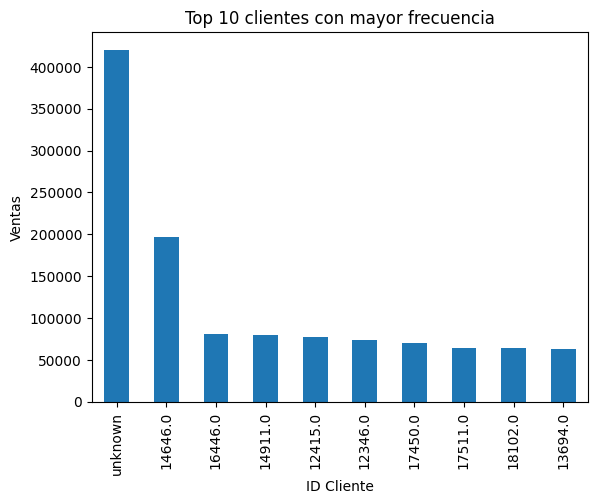

In [39]:
#CLIENTES CON MAS COMPRAS
top_10_products = df.groupby('CUSTOMER_ID')['QUANTITY'].sum().sort_values(ascending=False).head(10)

top_10_products.plot(kind="bar",x="CUSTOMER_ID",title="Top 10 clientes con mayor frecuencia",ylabel="Ventas",xlabel="ID Cliente")
plt.show()

## Frecuencia por orden de compra

In [40]:
df_freq=df[df['CUSTOMER_ID']!='unknown']

In [41]:
df_frequency=df_freq.groupby(['CUSTOMER_ID'],as_index=False)['INVOICE_NO'].count()
fig = px.histogram(df_frequency, x="INVOICE_NO")
fig.show()

##  Monetary. 
---
Esta métrica es la más sencilla, representa simplemente el monto en dinero invertido por el cliente comprando un producto.

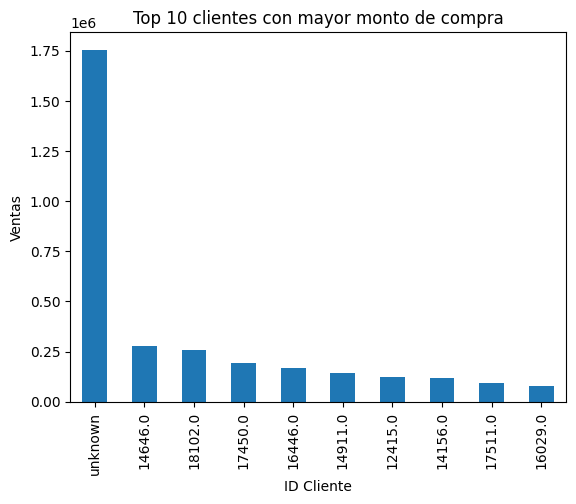

In [42]:
#CLIENTES QUE MAYOR GANANCIA DEJAN
top_10_products = df.groupby('CUSTOMER_ID')['TOTAL_REVENUE'].sum().sort_values(ascending=False).head(10)

top_10_products.plot(kind="bar",x="CUSTOMER_ID",title="Top 10 clientes con mayor monto de compra",ylabel="Ventas",xlabel="ID Cliente")
plt.show()

### Histograma de ganancias

In [43]:
df_mon=df[df['CUSTOMER_ID']!='unknown']

In [44]:
df_monetary=df_mon.groupby(['CUSTOMER_ID'],as_index=False)['TOTAL_REVENUE'].sum()
fig = px.histogram(df_monetary, x="TOTAL_REVENUE")
fig.show()

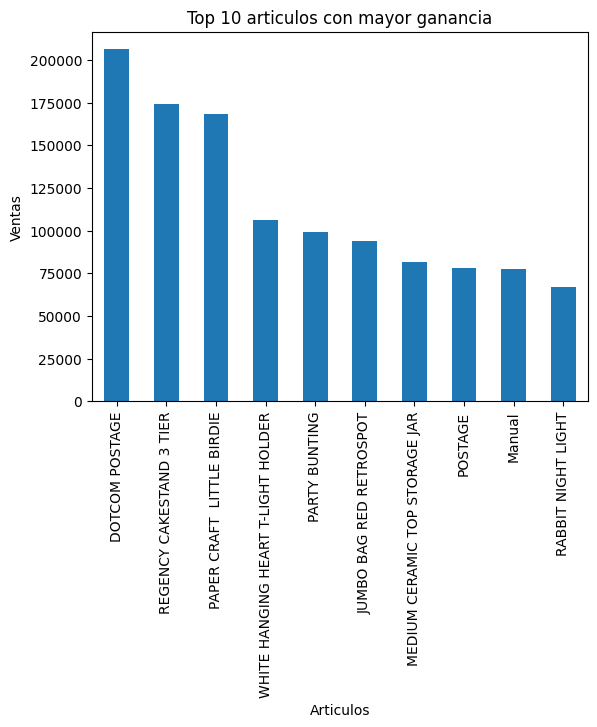

In [45]:
#ARTICULOS CON MAYOR GANANCIA
top_10_products = df.groupby('DESCRIPTION')['TOTAL_REVENUE'].sum().sort_values(ascending=False).head(10)

top_10_products.plot(kind="bar",x="DESCRIPTION",title="Top 10 articulos con mayor ganancia",ylabel="Ventas",xlabel="Articulos")
plt.show()

In [46]:
# df.groupby('INVOICE_DATE').agg({'CUSTOMER_ID':'sum'}).reset_index()

## Recency. 
---
Esta métrica se puede construir tomando como base el día actual y a este restar los días hasta la última fecha de compra del cliente, puede ser días, semanas, años, esto depende del tipo de industria y la frecuencia promedio de compra (las personas no compran un auto nuevo cada 2 semanas, o tal vez sí, pero no las conocemos). Así que puedes usar la última fecha de compra del conjunto de datos como parámetro para estimar la diferencia de días del resto de compras.


In [47]:
df_dates = df.sort_values('INVOICE_DATE')

df_dates.head()

INVOICE_NO STOCK_CODE                          DESCRIPTION  QUANTITY  \
0     536365     85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1     536365      71053                  WHITE METAL LANTERN         6   
2     536365     84406B       CREAM CUPID HEARTS COAT HANGER         8   
3     536365     84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4     536365     84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

         INVOICE_DATE  UNIT_PRICE CUSTOMER_ID          REGION  TOTAL_REVENUE  \
0 2019-12-01 08:26:00        2.55     17850.0  United Kingdom          15.30   
1 2019-12-01 08:26:00        3.39     17850.0  United Kingdom          20.34   
2 2019-12-01 08:26:00        2.75     17850.0  United Kingdom          22.00   
3 2019-12-01 08:26:00        3.39     17850.0  United Kingdom          20.34   
4 2019-12-01 08:26:00        3.39     17850.0  United Kingdom          20.34   

   MONTH  YEAR  DAY  
0     12  2019    6  
1     12  2019    6  
2     12  2019    6  
3     12  2019    6  
4     12  2019    6

In [48]:
orders_per_month= df_dates.groupby('MONTH').agg({'CUSTOMER_ID':'nunique','TOTAL_REVENUE':'sum'})

orders_per_month['Orders_per_user'] = orders_per_month['TOTAL_REVENUE']/ orders_per_month['CUSTOMER_ID'] 
print(orders_per_month.head(12))
print()

mean_orders= orders_per_month['CUSTOMER_ID'].mean()
print('Promedio de compra por mes:',mean_orders)


       CUSTOMER_ID  TOTAL_REVENUE  Orders_per_user
MONTH                                             
1              742     689811.610       929.665243
2              759     522545.560       688.465823
3              975     716215.260       734.579754
4              857     536968.491       626.567667
5             1057     769296.610       727.811362
6              992     760547.010       766.680454
7              950     718076.121       755.869601
8              936     757841.380       809.659594
9             1267    1056435.192       833.808360
10            1365    1151263.730       843.416652
11            1665    1503866.780       903.223291
12            1266    1459243.060      1152.640648

Promedio de compra por mes: 1069.25


In [49]:
fig = px.histogram(orders_per_month, x="Orders_per_user")
fig.show()

### Dias sin comprar

In [50]:
df_recency=df.groupby(['CUSTOMER_ID'],as_index=False)['INVOICE_DATE'].max()
df_recency['days_since_last_sale']=(datetime.now()-df_recency['INVOICE_DATE']).dt.days
df_recency

CUSTOMER_ID        INVOICE_DATE  days_since_last_sale
0        12346.0 2020-01-18 10:01:00                  1627
1        12347.0 2020-12-07 15:52:00                  1303
2        12348.0 2020-09-25 13:13:00                  1376
3        12349.0 2020-11-21 09:51:00                  1319
4        12350.0 2020-02-02 16:01:00                  1612
...          ...                 ...                   ...
4334     18281.0 2020-06-12 10:53:00                  1481
4335     18282.0 2020-12-02 11:43:00                  1308
4336     18283.0 2020-12-06 12:02:00                  1304
4337     18287.0 2020-10-28 09:29:00                  1343
4338     unknown 2020-12-09 10:26:00                  1301

[4339 rows x 3 columns]

In [51]:
df_recency_merged=df.merge(df_recency,on='CUSTOMER_ID')

In [52]:
df_recency_merged_filt=df_recency_merged[df_recency_merged['CUSTOMER_ID']!='unknown']

In [53]:
fig = px.histogram(df_recency_merged_filt, x="days_since_last_sale")
fig.show()

## ¿Cúal es el país donde más se vende?

In [54]:
df_country=df.groupby(['REGION'],as_index=False)['TOTAL_REVENUE'].sum().sort_values(by='TOTAL_REVENUE',ascending=False)
top_10_country=df_country.head(10)
fig_coun=px.bar(top_10_country,x='REGION',y='TOTAL_REVENUE',barmode='group',title='Ventas por país')
fig_coun.show()

In [55]:
fig = px.choropleth(
    df_country,
    locations='REGION',          # Nombre de la columna con los nombres de los países
    locationmode='country names', # Modo de localización basado en los nombres de los países
    color='TOTAL_REVENUE',                # Nombre de la columna con los valores a graficar
    hover_name='REGION',         # Nombre de la columna para el tooltip
    color_continuous_scale=px.colors.sequential.Plasma,  # Escala de colores
    scope='world'
)

# Título del gráfico
fig.update_layout(
    title_text='Valores por País',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'),
    width=800,  # Ancho del gráfico
    height=600,  # Alto del gráfico
    margin=dict(l=0, r=0, t=50, b=0)  # Margenes del gráfico
    
)

# Mostrar el gráfico
fig.show()

In [56]:
fig = px.choropleth(
    top_10_country,
    locations='REGION',          # Nombre de la columna con los nombres de los países
    locationmode='country names', # Modo de localización basado en los nombres de los países
    color='TOTAL_REVENUE',                # Nombre de la columna con los valores a graficar
    hover_name='REGION',         # Nombre de la columna para el tooltip
    color_continuous_scale=px.colors.sequential.Plasma,  # Escala de colores
    scope='world'
)

# Título del gráfico
fig.update_layout(
    title_text='Valores por País',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'),
    width=800,  # Ancho del gráfico
    height=600,  # Alto del gráfico
    margin=dict(l=0, r=0, t=50, b=0)  # Margenes del gráfico
    
)

# Mostrar el gráfico
fig.show()

## Ventas en función del tiempo

## ¿En que mes se vende más?

In [57]:
df_dates=df.copy()
df_dates.set_index('INVOICE_DATE',inplace=True)
df_dates.sort_index(inplace=True)
df_dates.head(10)

INVOICE_NO STOCK_CODE  \
INVOICE_DATE                                
2019-12-01 08:26:00     536365     85123A   
2019-12-01 08:26:00     536365      71053   
2019-12-01 08:26:00     536365     84406B   
2019-12-01 08:26:00     536365     84029G   
2019-12-01 08:26:00     536365     84029E   
2019-12-01 08:26:00     536365      22752   
2019-12-01 08:26:00     536365      21730   
2019-12-01 08:28:00     536366      22633   
2019-12-01 08:28:00     536366      22632   
2019-12-01 08:34:00     536367      84879   

                                             DESCRIPTION  QUANTITY  \
INVOICE_DATE                                                         
2019-12-01 08:26:00   WHITE HANGING HEART T-LIGHT HOLDER         6   
2019-12-01 08:26:00                  WHITE METAL LANTERN         6   
2019-12-01 08:26:00       CREAM CUPID HEARTS COAT HANGER         8   
2019-12-01 08:26:00  KNITTED UNION FLAG HOT WATER BOTTLE         6   
2019-12-01 08:26:00       RED WOOLLY HOTTIE WHITE HEART.         6   
2019-12-01 08:26:00         SET 7 BABUSHKA NESTING BOXES         2   
2019-12-01 08:26:00    GLASS STAR FROSTED T-LIGHT HOLDER         6   
2019-12-01 08:28:00               HAND WARMER UNION JACK         6   
2019-12-01 08:28:00            HAND WARMER RED POLKA DOT         6   
2019-12-01 08:34:00        ASSORTED COLOUR BIRD ORNAMENT        32   

                     UNIT_PRICE CUSTOMER_ID          REGION  TOTAL_REVENUE  \
INVOICE_DATE                                                                 
2019-12-01 08:26:00        2.55     17850.0  United Kingdom          15.30   
2019-12-01 08:26:00        3.39     17850.0  United Kingdom          20.34   
2019-12-01 08:26:00        2.75     17850.0  United Kingdom          22.00   
2019-12-01 08:26:00        3.39     17850.0  United Kingdom          20.34   
2019-12-01 08:26:00        3.39     17850.0  United Kingdom          20.34   
2019-12-01 08:26:00        7.65     17850.0  United Kingdom          15.30   
2019-12-01 08:26:00        4.25     17850.0  United Kingdom          25.50   
2019-12-01 08:28:00        1.85     17850.0  United Kingdom          11.10   
2019-12-01 08:28:00        1.85     17850.0  United Kingdom          11.10   
2019-12-01 08:34:00        1.69     13047.0  United Kingdom          54.08   

                     MONTH  YEAR  DAY  
INVOICE_DATE                           
2019-12-01 08:26:00     12  2019    6  
2019-12-01 08:26:00     12  2019    6  
2019-12-01 08:26:00     12  2019    6  
2019-12-01 08:26:00     12  2019    6  
2019-12-01 08:26:00     12  2019    6  
2019-12-01 08:26:00     12  2019    6  
2019-12-01 08:26:00     12  2019    6  
2019-12-01 08:28:00     12  2019    6  
2019-12-01 08:28:00     12  2019    6  
2019-12-01 08:34:00     12  2019    6

In [58]:
df_series=df_dates['TOTAL_REVENUE']
df_series=df_series.resample('1M').sum()

In [59]:
fig = px.line(df_series, markers=True,title='Serie de ventas')
fig.show()

## ¿En que mes se vende más cantidad de productos?

In [60]:
df_series_q=df_dates['QUANTITY']
df_series_q=df_series_q.resample('1M').sum()

In [61]:
fig_1 = px.line(df_series_q, markers=True,title='Serie de numero ventas')
fig_1.show()


# Reporte de resultados